# Part 1 - Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the data
dataset_train = pd.read_csv('/Users/monipeni/Documents/Deep_Learning_A_Z/Volume 1 - Supervised Deep Learning/Building a RNN/Google_Stock_Price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
dataset_train.shape # it contains 1258 stock prices between 2012 and 2016

(1258, 6)

In [5]:
# Importing the training set
training_set = dataset_train.iloc[:, 1:2].values

# this will be the training set on which our RNN will be trained. 
# [ :, 1:2] We want the second column of our data. We put : because we want all the rows. 
# The second column is index 1. But we can not input the index 1 only, because we want to create a Numpy array and 
# not a simple vector. That´s why we write 1:2, column one to two, but two is excluded so only take the first column
# .values create the Numpy array

In [6]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [7]:
training_set.shape # training_set is a Numpy array of 1258 lines corresponding to the 1258 stock prices 

(1258, 1)

In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Whenever we build a RNN and especially if there is a sigmoid function as the activation function in the output
# layer of our recurrent neural network, is recommended to apply normalisation. And that´s MinMaxScaler.
# feature_range = (0,1) is per default. All the stock prices are gonna be numbers between 0 and 1.

In [9]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [10]:
# Creating a data structure with 60 timesteps and 1 output. 

# 60 timesteps correspond to the 60 previous financial days. There are 20 financial days in one month, so that means 
# each day we are gonna look at the 3 previous month to try to predict the stock price the next day.

X_train = [] # me make an empty list, later we will append the prices 
y_train = [] # same here
for i in range(60, 1258): # the first index we are gonna train is the number 60, because we need 60 previous timesteps.
                        # python starts with index 0, that´s why we don´t write 61.
                        # the index of the last price is 1257, but we write 1258 because in python the index rest one.
    X_train.append(training_set_scaled[i-60:i, 0]) # i-60:i  for each price we want to predict, we look 60 prices before.
                                                # is gonna look the rows from 0 to 59 ( are 60 lines) to predict the 60th
                                                # 0 is the column, is only one column and then is index 0
    y_train.append(training_set_scaled[i, 0]) # i is the price we want to predict
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train.shape

(1198, 60)

In [12]:
y_train.shape

(1198,)

In [13]:
# Reshaping

# add a new dimension in our Numpy Array 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# the first argument is the numpy array that we want to reshape, add this new dimension corresponding to the predictor,
# or in our problem, the indicator
# in the 2nd argument we need to specify this new structure, that is this new shape we want our Numpy array to have,
# a 3D array, containing the following 3 dimensions: first, the batch size, which will correspond to the total number
# of observations we have. Second, is timesteps. And the third step is the one corresponding to the indicators,
# the predictors. 
# Example: we have to predict stock prices from Apple, we know iphone uses many material from Samsung. So the 
# stock prices from Apple and Samsung might be highly correlated. If we add as a third dimension the stock prices 
# from Samsung, the prediction will be higher.
# X_train.shape[0] gives me the number of lines of X_train
# X_train.shape[1] gives me the number of columns of X_train, which is exactly the number of timesteps
# 1 because we have only one indicator, we don´t add any other data to make the prediction

In [14]:
X_train.shape # we have 3 dimensions now

(1198, 60, 1)

# Part 2 - Building the RNN

In [15]:
# Importing the Keras libraries and packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [16]:
# Initialising the RNN
regressor = Sequential() # as a sequence of layers. We called regressor because this time we are predicting a 
                         # continuous value. Classification is about predicting a cathegory.

In [17]:
# Adding the first LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))


# LSTM arguments: 
# first : number of LSTM units or neurons you want to have in this LSTM layer. You can choose any number of neurons,
# but we choose 50 because we want a model with high dimensionality. If it´s only 5 neurons, will be too little.
# second : return_sequences we put True, because we want to add another layer. When we don´t want to add more layers,
# we can put False or don´t write it, because False is the default value.
# third : input_shape is the shape of the input containing X_train that we created in 3D. But we only have to indicate
# the last 2 arguments of the 3D, the timesteps and the indicators, because the first one, corresponding to the
# observations will be automatically taken into account

regressor.add(Dropout(0.2)) # to avoid over fitting, drop 20% of the neurons is the recommendation.

In [18]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True)) # we don´t need to write the input layer anymore, because 
                                                        # the model knows from before
regressor.add(Dropout(0.2))

In [19]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [20]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50)) # we are not gonna add more LSTM layers, so we delete the return_sequences = True
regressor.add(Dropout(0.2))

In [21]:
# Adding the output layer
regressor.add(Dense(units = 1)) # the output layer is fully connected to the fourth LSTM layer, that´s why we use
                                # DEnse, and it only has one argument, the number of neurons that needs to be in this
                                # output layer. We are predicting a real value, corresponding to the stock price, so
                                # the output has only one dimension (units=1)

In [22]:
# Compiling the RNN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') 

# the most relevant optimizers in RNN are 'adam' or 'RMS prop', in this case we use 'adam', because is very 
# powerful and it always perform some relevant updates of the weights.
# loss = we are dealing with a regression problem because we have to predict a continuous value, so the loss is 
# the mean squared error ( the error can be mesure this time by the mean of the squared differences between the
# predictions and the targets or real values)

In [23]:
# Fitting the RNN to the Training set

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

# fit has 4 arguments:
# 1. Input 
# 2. Ground truth
# 3. Number of epochs : how many iterations do you want your RNN to be trained.
# 4. Batch_size : numbers of samples processed before the model is updated

Epoch 1/100
1198/1198 [==============================] - 31s 26ms/step - loss: 0.0381
Epoch 2/100
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0063
Epoch 3/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0050
Epoch 7/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0049
Epoch 8/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0044
Epoch 10/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0041
Epoch 11/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0042
Epoch 12/100
1198/1198 [============================

In [24]:
# Part 3 - Making the predictions and visualising the results

In [25]:
# Getting the real stock price of 2017

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv') # this data set contains 20 stock prices of January 2017
real_stock_price = dataset_test.iloc[:, 1:2].values # [:,1:2]we want all the rows and the second column of the data

In [26]:
# Getting the predicted stock price of 2017

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) 

# 'Open' is the name of the column in our dataset that contains the Google stock prices
# axis = 0 , because we want to concatenate the lines, we want to add the stock prices of the test set to the
# stock prices of the training set, so we need to make a concatenation around the vertical axis, which is 0.
# for a horizontal concatenation we use axis = 1

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values 

# to the len of the total dataset (final index of the whole dataset) we substract the len of the dataset_test (that
# is exactly 20 )( we have 20 prices for every month, from monday to friday every week is 5x4=20) 
# and we obtain January 3rd, 2017
# - 60 because we need the 60 previous prices to predict
# .values to make this a Numpy Array

inputs = inputs.reshape(-1,1) # we create the 3D structure, always with arguments -1,1
inputs = sc.transform(inputs) # we scale our inputs, but has to be with the same scaling that was applied to 
                            # the training set , we don´t use fit , we used transform method
    
X_test = [] # we copy and paste the data structure that we did before. We don´t need y_test because this time 
            #we are not doing some training, we are doing some predictions.
for i in range(60, 80): # before we used the numbers 60,1258. We still start at 60 because we need the 60 previous 
                        # predictions, but this time we don´t need the whole dataset, we don´t need all the stock
                        # prices of 5 years, we only need to get our input for the test set and the test set 
                        # contains only 20 financial days (each of the stock prices of January 2017), so 60+20 = 80
    X_test.append(inputs[i-60:i, 0]) # we keep the 0 which correspond to the Open column, the stocks prices
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # we add the new dimension for 3D

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price) # we need to invert the scaling of our 
                    # predictions, because our regressor was trained to predict the scaled values of the stock
                    # prices. To get the original scale of these scaled predicted values we need to apply the
                    # inverse transform method from our scaling sc object.

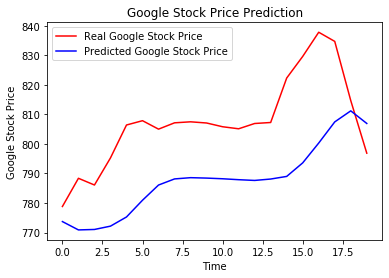

In [27]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# Results

We have the real Google stock price in red and our predicted Google stock price in blue. We get this 
comparison of the real and the predicted prices for the whole month of January 2017 and we obtained good results.
In the parts of the predictions containing some spikes, our predictions lag behind the actual values because our
model can´t react to fast nonlinear changes. For the parts of the predictions containing smooth changes our model
reacts pretty well and manages to follow the upward and downward trends.

# Evaluating the RNN

For Regression, the way to evaluate the model performance is with a metric called RMSE (Root Mean Squared Error). It is calculated as the root of the mean of the squared differences between the predictions and the real values.

However for our specific Stock Price Prediction problem, evaluating the model with the RMSE does not make much sense, since we are more interested in the directions taken by our predictions, rather than the closeness of their values to the real stock price. We want to check if our predictions follow the same directions as the real stock price and we don’t really care whether our predictions are close the real stock price. The predictions could indeed be close but often taking the opposite direction from the real stock price.

Nevertheless if we are interested in the code that computes the RMSE for our Stock Price Prediction problem, it would be:

import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

Then consider dividing this RMSE by the range of the Google Stock Price values of January 2017 (that is around 800) to get a relative error, as opposed to an absolute error. It is more relevant since for example if you get an RMSE of 50, then this error would be very big if the stock price values ranged around 100, but it would be very small if the stock price values ranged around 10000.


# Improving the RNN

Different ways to improve the RNN model:

-Getting more training data: we trained our model on the past 5 years of the Google Stock Price but it would be even better to train it on the past 10 years.

-Increasing the number of timesteps: the model remembered the stock prices from the 60 previous financial days to predict the stock price of the next day. That’s because we chose a number of 60 timesteps (3 months). We could try to increase the number of timesteps, by choosing for example 120 timesteps (6 months).

-Adding some other indicators: if we have the financial instinct that the stock price of some other companies might be correlated to the one of Google, we could add this other stock price as a new indicator in the training data.

-Adding more LSTM layers: we built a RNN with four LSTM layers but we could try with even more.

-Adding more neurones in the LSTM layers: we highlighted the fact that we needed a high number of neurones in the LSTM layers to respond better to the complexity of the problem and we chose to include 50 neurones in each of our 4 LSTM layers. We could try an architecture with even more neurones in each of the 4 (or more) LSTM layers.


We can do some Parameter Tuning on the RNN model we implemented. This time we are dealing with a Regression problem because we predict a continuous outcome (the Google Stock Price), so we use scoring = 'neg_mean_squared_error' 
in the GridSearchCV class parameters.